In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/MyDrive/Fer2013dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
import numpy as np
import cv2

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D

from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = '/content/train'
val_dir = '/content/test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [ ]:
validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [ ]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

#emotion_model.add(Conv2D(64, kernel_size=(3, 3),padding='same', activation='relu', input_shape=(48,48,1)))
#emotion_model.add(Conv2D(128, kernel_size=(3, 3),padding='same', activation='sigmoid'))
#emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
#emotion_model.add(Dropout(0.15))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.50))
emotion_model.add(Dense(7, activation='softmax'))


In [ ]:
emotion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                  

In [ ]:
from tensorflow.keras.optimizers import Adam
# tf.keras.optimizers.Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=10000,
    decay_rate=0.9)

In [ ]:
optimizer = Adam( learning_rate= lr_schedule)

In [ ]:
# compile the model
emotion_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy']) # mse mae

In [ ]:
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


448/448 [==============================] - 19s 40ms/step - loss: 1.8097 - accuracy: 0.2528 - val_loss: 1.7587 - val_accuracy: 0.3045
Epoch 2/50
448/448 [==============================] - 18s 40ms/step - loss: 1.6553 - accuracy: 0.3510 - val_loss: 1.5814 - val_accuracy: 0.4039
Epoch 3/50
448/448 [==============================] - 18s 39ms/step - loss: 1.5509 - accuracy: 0.3987 - val_loss: 1.4918 - val_accuracy: 0.4304
Epoch 4/50
448/448 [==============================] - 20s 45ms/step - loss: 1.4789 - accuracy: 0.4309 - val_loss: 1.4274 - val_accuracy: 0.4607
Epoch 5/50
448/448 [==============================] - 18s 39ms/step - loss: 1.4171 - accuracy: 0.4575 - val_loss: 1.3658 - val_accuracy: 0.4837
Epoch 6/50
448/448 [==============================] - 18s 40ms/step - loss: 1.3604 - accuracy: 0.4839 - val_loss: 1.3346 - val_accuracy: 0.4946
Epoch 7/50
448/448 [==============================] - 18s 39ms/step - loss: 1.3182 - accuracy: 0.5015 - val_loss: 1.2968 - val_accuracy: 0.5092
Epo

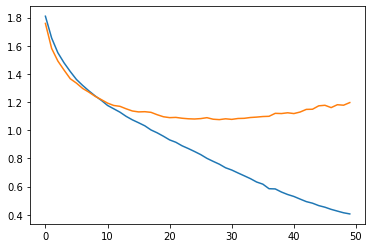

In [ ]:
import matplotlib.pyplot as plt

plt.plot(emotion_model_info.history['loss'])
plt.plot(emotion_model_info.history['val_loss']) 

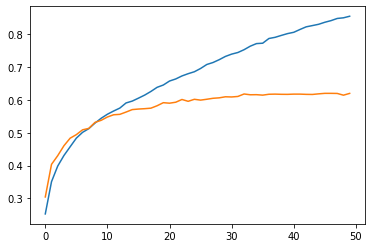

In [ ]:
plt.plot(emotion_model_info.history['accuracy'])
plt.plot(emotion_model_info.history['val_accuracy'])

In [ ]:
 emotion_model.save_weights('model.h5')